# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `ebola_2014_2016_clean.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

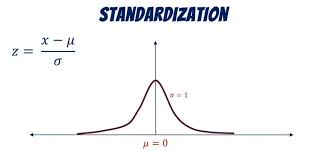


In [11]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
#standardized_data = None  # Do not use sklearn (Data - Data Mean)/ Data's Standard Deviation
#standardized_data[:5]  # Display the first few rows of standardized data

# Step 1: Load and Standardize the data (use of numpy only allowed for PCA computations)
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('ebola_2014_2016_clean.csv')
# Select numerical columns for PCA
X = data[['Cumulative no. of confirmed, probable and suspected cases', 
          'Cumulative no. of confirmed, probable and suspected deaths']].values

# Handle missing values (if any)
X = X[~np.isnan(X).any(axis=1)]  # Remove rows with NaN values

# Standardize the data: (X - mean) / std
data_mean = np.mean(X, axis=0)
data_std = np.std(X, axis=0, ddof=1)  # ddof=1 for sample standard deviation
standardized_data = (X - data_mean) / data_std

# Output the first few rows of standardized data
standardized_data[:5]

array([[-0.43045579, -0.36294603],
       [-0.57253467, -0.61811731],
       [-0.34507293, -0.36777196],
       [-0.26556297, -0.20369019],
       [-0.291991  , -0.32614827]])

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [13]:
# Step 3: Calculate the Covariance Matrix
#cov_matrix = None  # Calculate covariance matrix
#cov_matrix

# Step 3: Calculate the Covariance Matrix
n_samples = standardized_data.shape[0]
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)

# Output the covariance matrix
cov_matrix

array([[1.        , 0.95579954],
       [0.95579954, 1.        ]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [14]:
# Step 4: Perform Eigendecomposition
#eigenvalues, eigenvectors = None  # Perform eigendecomposition
#eigenvalues, eigenvectors

# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # eigh for symmetric matrices

# Output eigenvalues and eigenvectors
eigenvalues, eigenvectors

(array([0.04420046, 1.95579954]),
 array([[-0.70710678,  0.70710678],
        [ 0.70710678,  0.70710678]]))

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [15]:
# Step 5: Sort Principal Components
#sorted_indices = None  # Sort eigenvalues in descending order
#sorted_eigenvectors = None  # Sort eigenvectors accordingly
#sorted_eigenvectors

# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices of eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Output sorted eigenvectors
sorted_eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [16]:
# Step 6: Project Data onto Principal Components
#num_components = None  # Decide on the number of principal components to keep
#reduced_data = None  # Project data onto the principal components
#reduced_data[:5]

# Step 6: Project Data onto Principal Components
num_components = 2  # Keep both components since we have only 2 features
selected_eigenvectors = sorted_eigenvectors[:, :num_components]
reduced_data = np.dot(standardized_data, selected_eigenvectors)

# Output the first few rows of reduced data
reduced_data[:5]

array([[-0.5610198 ,  0.04773661],
       [-0.84191809, -0.03223179],
       [-0.50405746, -0.01605064],
       [-0.33181209,  0.04375066],
       [-0.43709047, -0.02415284]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

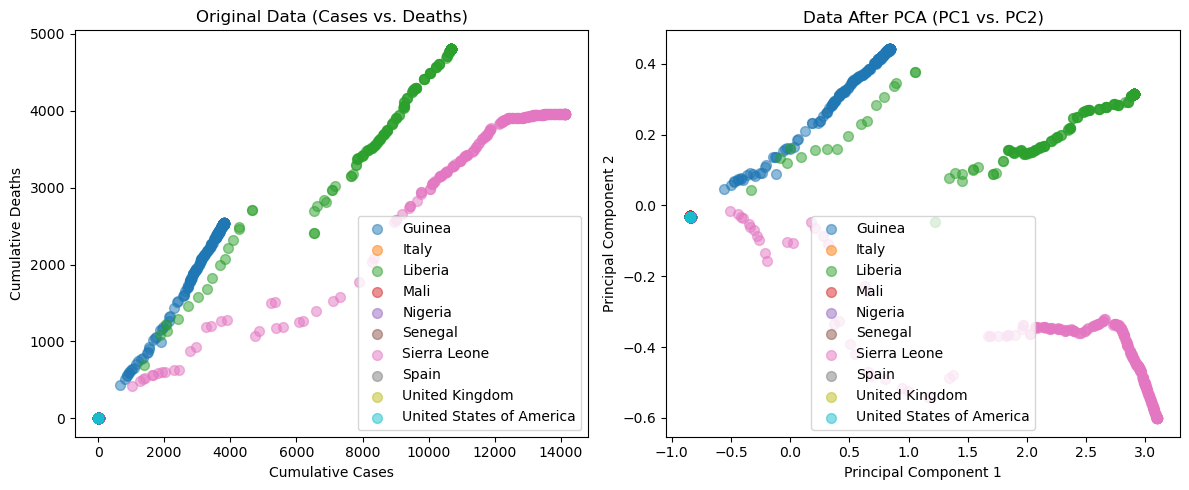

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('ebola_2014_2016_clean.csv')
X = data[['Cumulative no. of confirmed, probable and suspected cases', 
          'Cumulative no. of confirmed, probable and suspected deaths']].values
countries = data['Country'].values

# Remove rows with NaN values
valid_indices = ~np.isnan(X).any(axis=1)
X = X[valid_indices]
countries = countries[valid_indices]  # Keep corresponding country labels

# Standardize the data
data_mean = np.mean(X, axis=0)
data_std = np.std(X, axis=0, ddof=1)
standardized_data = (X - data_mean) / data_std

# Compute PCA
n_samples = standardized_data.shape[0]
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
reduced_data = np.dot(standardized_data, sorted_eigenvectors)

# Define colors for countries
unique_countries = np.unique(countries)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_countries)))
country_colors = dict(zip(unique_countries, colors))

# Create scatter plots
plt.figure(figsize=(12, 5))

# Plot 1: Original Data
plt.subplot(1, 2, 1)
for country in unique_countries:
    mask = countries == country
    plt.scatter(X[mask, 0], X[mask, 1], alpha=0.5, label=country, 
               c=[country_colors[country]], s=50)
plt.title('Original Data (Cases vs. Deaths)')
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')
plt.legend()

# Plot 2: PCA-Transformed Data
plt.subplot(1, 2, 2)
for country in unique_countries:
    mask = countries == country
    plt.scatter(reduced_data[mask, 0], reduced_data[mask, 1], alpha=0.5, 
               label=country, c=[country_colors[country]], s=50)
plt.title('Data After PCA (PC1 vs. PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()